### Hypothesis Testing for the population true mean marginal PER between MVP and the league

In [264]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
df = pd.read_csv('Clean NBA Player Data.csv')

In [265]:
#to generate a sample size of 30 marginal PER between MVPs and season average

MVP = ['Michael Jordan*','Magic Johnson*','Michael Jordan*','Michael Jordan*','Charles Barkley*','Hakeem Olajuwon*','David Robinson*','Michael Jordan*','Karl Malone*','Michael Jordan*','Karl Malone*']
Season = [1988,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999]
MVP_winner = list(zip(MVP,Season))
df.loc[444,'MVP'] = 1

df = df.set_index(['Year', 'Player'])
for mvp, year in MVP_winner:
    df.loc[(year,mvp),'MVP'] = 1

df_mvps = df[df.MVP == 1]
df_mvps = df_mvps.sort_values(by=['Year1'])

In [266]:
#function to calculate the marginal PER from the MVP of that season and the league's average that season.
#takes in 2 dataframe

def marginal_PER(player, season_data):
    avg_PER = np.mean(season_data.PER)
    marginal_PER = float(player.PER) - avg_PER
    return marginal_PER

In [267]:
#compute a bootstrap replicate

def bs_sample_rep(marginal_data, size, func):
    return func(np.random.choice(marginal_data, size = size))

In [279]:
#compute the marginal PER between MVP to the league average

PER_margin = []
for i in range(1988,2018):
    PER_margin.append(marginal_PER(df_mvps[df_mvps.Year1 == i],df[df.Year1 == i]))

In [282]:
#create 10000 bootstrap replicates

sampling_dis = []

for i in range(10000):
    sampling_dis.append(bs_sample_rep(PER_margin, 30, np.mean))

true_mean = np.mean(sampling_dis)
true_mean

15.000742553412158

## Hypothesis Testing on the true mean of the marginal PER between MVP and league average

The point of this hypothesis testing is to determine whether the posed true average for the marginal PER between MVPs and the league average is 15.00. The marginal PER is calculated by taking the difference between the MVP and league average PER for a specific season. The value allows us to see how well the MVP performed relatively to all other players that season. Up until now, only a PER threshold has been determine analyze to win the MVP. But what if for one  season many players played badly compared to other seasons and the MVP award was given to an above average PER? It will be hard to rate players by just using the PER scale. Therefore, it will be helpful to gauge how well the average MVP out perform the league.

To begin the hypothesis testing, the null and alternative hypotheses are stated as follows:

$H_{o}: \mu = 15.00$

$H_{a}: \mu \neq 15.00$

A one sample t test will be used to determine if the p value is less than the significance level. If so, then the null hypothesis will be rejected and the alternative hypothesis will be accepted. The significance level will be preset to $\alpha = .05$.

t = $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$

As seen below,

t = 0.46179937561216977

p value = 0.64767081755407196

Since the p value is greater than the significance level, there isnt strong enough evidence to reject the null hypothesis. The 95% confidence interval is computed to be [14.210468128156421, 16.298867804774559] for this random sample.

In [232]:
#generate a random sample to compute the t score and its p value
bs_sample = np.random.choice(PER_margin, size = 30)
st.ttest_1samp(bs_sample, true_mean)

Ttest_1sampResult(statistic=0.46179937561216977, pvalue=0.64767081755407196)

In [263]:
sample_mean

15.25466796646549

In [255]:
#95% CI from the random sample

sample_mean = np.mean(bs_sample)
sample_std = np.std(bs_sample)
st.norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(30))

(14.210468128156421, 16.298867804774559)

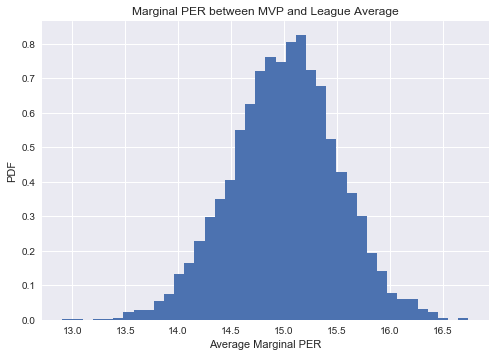

In [241]:
#plot sampling distribution of the sample mean of the Marginal PER

_ = plt.hist(sampling_dis, bins = 40, normed = True)
_ = plt.xlabel('Average Marginal PER')
_ = plt.ylabel('PDF')
_ = plt.title('Marginal PER between MVP and League Average')
sns.set()
plt.show()